# Лабораторная работа №1
## Выполнил студент группы БПИ2301
### Задание №1
Описание условия задания

In [405]:
print("Hello, World!")

Hello, World!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры m, n, min_limit, max_limit, где m и n указывают размер
матрицы, а min_lim и max_lim - минимальное и максимальное значение для
генерируемого числа . По умолчанию при отсутствии параметров принимать следующие
значения:  
m = 50  
n = 50  
min_limit = -250  
max_limit = 1000 + (номер своего варианта) = 1020

In [406]:
import random

def get_matrix(m=50, n=50, min_limit=-250, max_limit=1020):
    array = [[random.randint(min_limit, max_limit) for _ in range(n)] for _ in range(m)]
    return array

get_matrix(10, 10)

[[75, 274, 757, 56, -153, 153, 114, 415, 998, 243],
 [152, 881, -94, -100, 644, 955, 57, 471, 420, 762],
 [133, 156, 536, 715, 231, 211, 977, 1004, 39, 765],
 [-45, -6, 831, -137, 472, 846, 994, -225, 462, 845],
 [56, -22, 212, 80, 42, 379, 373, 404, 42, 52],
 [-154, 551, 624, -25, -28, 637, 1016, 1007, 661, 234],
 [967, 999, 29, 742, 45, 267, 79, 507, 406, 310],
 [863, 17, 224, 585, 555, 157, -109, 229, 844, -66],
 [710, -26, 611, -45, 334, 97, 452, 540, 103, 256],
 [889, -122, 923, 915, 317, 411, 800, 564, 638, 773]]

### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.


Сортировка выбором  
<sub>Временная сложность O(n^2)</sub>

In [407]:
def selection_sort(arr):
    for i in range(len(arr) - 1):
        min_index = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]

def selection_sort_2D(matrix):
    for i in range(len(matrix)):
        selection_sort(matrix[i])

Сортировка вставкой  
<sub>Временная сложность O(n^2)</sub>

In [408]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        temp = arr[i]
        j = i - 1
        while (j >= 0 and temp < arr[j]):
            arr[j + 1] = arr[j]
            j = j - 1
        arr[j + 1] = temp

def insertion_sort_2D(matrix):
    for i in range(len(matrix)):
        insertion_sort(matrix[i])

Сортировка обменом (пузырьком)  
<sub>Временная сложность O(n^2)</sub>

In [409]:
def exchange_sort(arr):
    for i in range(len(arr) - 1, 0, -1):
        no_swap = True
        for j in range(0, i):
            if arr[j + 1] < arr[j]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                no_swap = False
        if no_swap:
            return
 
def exchange_sort_2D(matrix):
    for i in range(len(matrix)):
        exchange_sort(matrix[i])

Сортировка Шелла  
<sub>Временная сложность O(n log n)</sub>

In [410]:
def shell_sort(arr):
    step = len(arr)//2
    while step > 0:
        for i in range(step, len(arr)):
            j = i
            delta = j - step
            while delta >= 0 and arr[delta] > arr[j]:
                arr[delta], arr[j] = arr[j], arr[delta]
                j = delta
                delta = j - step
        step //= 2

def shell_sort_2D(matrix):
    for i in range(len(matrix)):
        shell_sort(matrix[i])

Турнирная сортировка  
<sub>Временная сложность O(n log n)</sub>

In [411]:
def tournament_sort(arr):
    n = len(arr)
    tree = [0]*n + arr
    
    for i in range(n - 1, 0, -1):
        tree[i] = min(tree[2*i], tree[2*i + 1])

    for i in range(n):
        arr[i] = tree[1]
        index = tree.index(tree[1], n)
        tree[index] = float('inf')

        index //= 2
        while index >= 1:
            tree[index] = min(tree[2 * index], tree[2 * index + 1])
            index //= 2

def tournament_sort_2D(matrix):
    for i in range(len(matrix)):
        shell_sort(matrix[i])

Быстрая сортировка  
<sub>Временная сложность O(n log n)</sub>

In [412]:
def partition(arr, low, high):
    pivot = arr[(low+high)//2]
    i = low - 1
    j = high + 1

    while (True):
        i += 1
        while (arr[i] < pivot):
            i += 1

        j -= 1
        while (arr[j] > pivot):
            j -= 1

        if (i >= j):
            return j

        arr[i], arr[j] = arr[j], arr[i]
        
 
def quick_sort(arr, low=0, high=None):
    if high is None:
        high = len(arr) - 1

    if (low < high):
        pi = partition(arr, low, high)

        quick_sort(arr, low, pi)
        quick_sort(arr, pi + 1, high)

def quick_sort_2D(matrix):
    for i in range(len(matrix)):
        quick_sort(matrix[i])

Пирамидальная сортировка  
<sub>Временная сложность O(n log n)</sub>

In [ ]:
def heapify(arr, i, size):
    l = 2*i + 1
    r = 2*i + 2
    largest = i
    if (l < size and arr[l] > arr[i]):
        largest = l
    if (r < size and arr[r] > arr[largest]):
        largest = r
    if (largest != i):
        arr[largest], arr[i] = arr[i], arr[largest]
        heapify(arr, largest, size)

def heap_sort(arr):
    # построение max-heap
    start = (len(arr) - 2)//2 # индекс корня последнего элемента
    while start >= 0:
        heapify(arr, start, len(arr))
        start = start - 1
    # сортировка
    for i in range(len(arr) - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, 0, i)

def heap_sort_2D(matrix):
    for i in range(len(matrix)):
        heap_sort(matrix[i])

Сравнение алгоритмов сортировки

In [414]:
import time

axis_x = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] # n столбцов
m = 200 # m строк

selection_sort_times = [] # Сортировка выбором
for n in axis_x:
    matrix = get_matrix(m, n)
    start_time = time.time()
    selection_sort_2D(matrix)
    selection_sort_times.append((time.time() - start_time) / m)

insertion_sort_times = [] # Сортировка вставкой
for n in axis_x:
    matrix = get_matrix(m, n)
    start_time = time.time()
    insertion_sort_2D(matrix)
    insertion_sort_times.append((time.time() - start_time) / m)

exchange_sort_times = [] # Сортировка обменом (пузырьком)
for n in axis_x:
    matrix = get_matrix(m, n)
    start_time = time.time()
    exchange_sort_2D(matrix)
    exchange_sort_times.append((time.time() - start_time) / m)

shell_sort_times = [] # Сортировка Шелла
for n in axis_x:
    matrix = get_matrix(m, n)
    start_time = time.time()
    shell_sort_2D(matrix)
    shell_sort_times.append((time.time() - start_time) / m)

tournament_sort_times = [] # Турнирная сортировка
for n in axis_x:
    matrix = get_matrix(m, n)
    start_time = time.time()
    tournament_sort_2D(matrix)
    tournament_sort_times.append((time.time() - start_time) / m)

quick_sort_times = [] # Быстрая сортировка
for n in axis_x:
    matrix = get_matrix(m, n)
    start_time = time.time()
    quick_sort_2D(matrix)
    quick_sort_times.append((time.time() - start_time) / m)

heap_sort_times = [] # Пирамидальная сортировка
for n in axis_x:
    matrix = get_matrix(m, n)
    start_time = time.time()
    heap_sort_2D(matrix)
    heap_sort_times.append((time.time() - start_time) / m)

standart_sort_times = [] # Стандартная сортировка
for n in axis_x:
    matrix = get_matrix(m, n)
    start_time = time.time()
    for i in range(len(matrix)):
        matrix[i].sort()
    standart_sort_times.append((time.time() - start_time) / m)

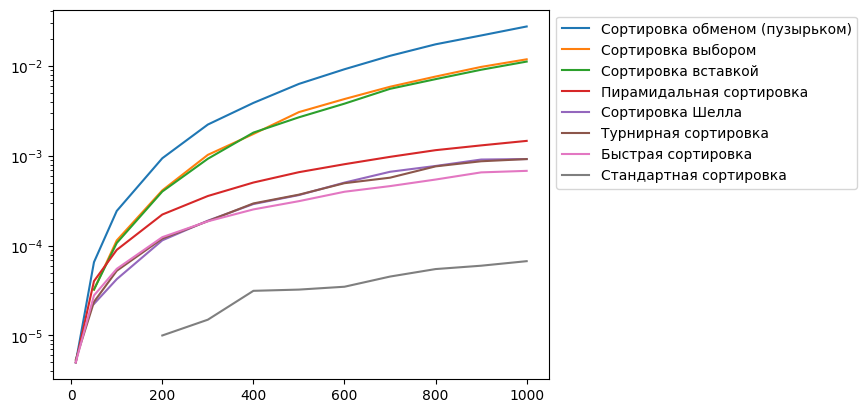

In [419]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()             
plt.yscale("logit")

ax.plot(axis_x, exchange_sort_times, label='Сортировка обменом (пузырьком)')
ax.plot(axis_x, selection_sort_times, label='Сортировка выбором')
ax.plot(axis_x, insertion_sort_times, label='Сортировка вставкой')
ax.plot(axis_x, heap_sort_times, label='Пирамидальная сортировка')
ax.plot(axis_x, shell_sort_times, label='Сортировка Шелла')
ax.plot(axis_x, tournament_sort_times, label='Турнирная сортировка')
ax.plot(axis_x, quick_sort_times, label='Быстрая сортировка')
ax.plot(axis_x, standart_sort_times, label='Стандартная сортировка')
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()

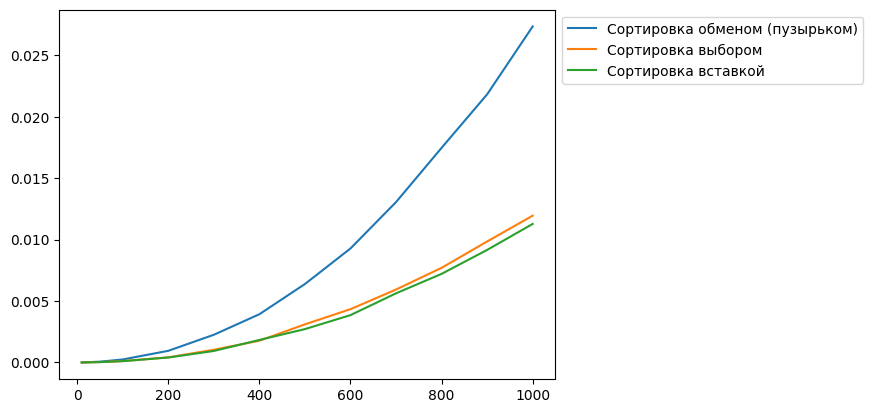

In [416]:
fig, ax = plt.subplots()    

ax.plot(axis_x, exchange_sort_times, label='Сортировка обменом (пузырьком)')
ax.plot(axis_x, selection_sort_times, label='Сортировка выбором')
ax.plot(axis_x, insertion_sort_times, label='Сортировка вставкой')
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()

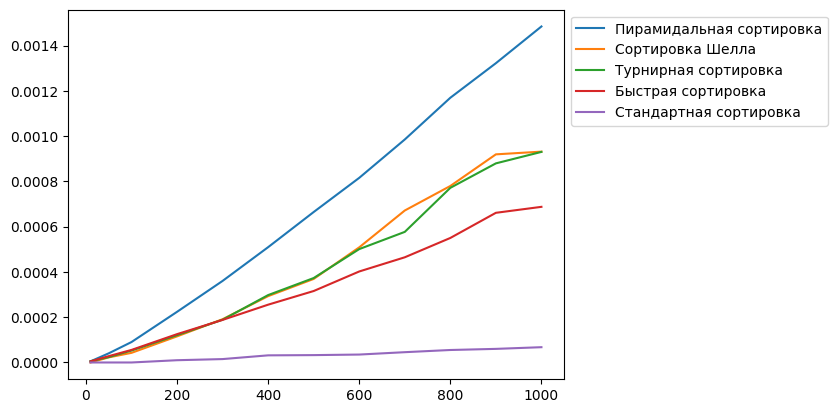

In [421]:
fig, ax = plt.subplots()   

ax.plot(axis_x, heap_sort_times, label='Пирамидальная сортировка')
ax.plot(axis_x, shell_sort_times, label='Сортировка Шелла')
ax.plot(axis_x, tournament_sort_times, label='Турнирная сортировка')
ax.plot(axis_x, quick_sort_times, label='Быстрая сортировка')
ax.plot(axis_x, standart_sort_times, label='Стандартная сортировка')
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()